<a href="https://colab.research.google.com/github/Sundaraviswanath-N/DS_PROJECT/blob/main/Project1_Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Conversion Prediction

## Problem Statement
You are working for a new-age insurance company and employ
multiple outreach plans to sell term insurance to your
customers. Telephonic marketing campaigns still remain one of
the most effective ways to reach out to people however they
incur a lot of cost. Hence, it is important to identify the
customers that are most likely to convert beforehand so that
they can be specifically targeted via call. We are given the
historical marketing data of the insurance company and are
required to build a ML model that will predict if a client will
subscribe to the insurance.

# Data Set

In [2]:
data_set = '/content/drive/MyDrive/Ds_Project_File/1.Customer Conversion Prediction/Customer Conversion Prediction.csv'

# Importing Requried Libaries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import plot_importance

# Removing Warnings


In [4]:
warnings.filterwarnings("ignore")

# Feaching Dataset 

In [5]:
df=pd.read_csv(data_set)
df.isnull().any()

age               False
job               False
marital           False
education_qual    False
call_type         False
day               False
mon               False
dur               False
num_calls         False
prev_outcome      False
y                 False
dtype: bool

# Basic Findings of Data


In [6]:
print("Size of Data set:",df.shape)

Size of Data set: (45211, 11)


In [7]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [8]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [10]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


# Finding the balance of dataset

In [11]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

**As per the result this data set is imbalanced**

In [12]:
print('NO % in Data set:',((39922)/(39922+5289))*100)
print('YES % in Data set:',((5289)/(39922+5289))*100)

NO % in Data set: 88.30151954170445
YES % in Data set: 11.698480458295547


As per the result NO has 88.30 %  and YES has 11.70 % in the dataset.

# Preprocessing Data

Checking Missing (NULL) Values

In [13]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [14]:
df.dropna()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [15]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

NO NULL Values

Checking any Duplicate values

In [16]:
df.duplicated().sum()

6

The data set has 6 values as duplicate. So we will drop it.

In [17]:
df=df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

Duplicate are Droped in the data set


In [19]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

Finding Unique Values in Categorical Columns

In [20]:
print("Unique Values of Job\n")
print(df['job'].unique())

print ("\n Unique values of Marital Status\n")
print(df['marital'].unique())

print ("\n Unique values of Educationsl Qualification\n")
print(df['education_qual'].unique())

print ("\n Unique values of Call Type\n")
print(df['call_type'].unique())

print ("\n Unique values of Month\n")
print(df['mon'].unique())

print ("\n Unique values of Previous Outcome\n")
print(df['prev_outcome'].unique())

print ("\n Unique values of Target Variable 'y'\n")
print(df['y'].unique())

Unique Values of Job

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

 Unique values of Marital Status

['married' 'single' 'divorced']

 Unique values of Educationsl Qualification

['tertiary' 'secondary' 'unknown' 'primary']

 Unique values of Call Type

['unknown' 'cellular' 'telephone']

 Unique values of Month

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

 Unique values of Previous Outcome

['unknown' 'failure' 'other' 'success']

 Unique values of Target Variable 'y'

['no' 'yes']


As per the result all values are unique. 
So there are no spelling mistake, mismatch in Upper and Lower Case in the data set





Replacing Unknown Values in the Dataset

Convering Target column in to Numerical Data

In [21]:
 df["target"] = df["y"].map({"yes":1,"no":0})
 df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0


In [22]:
count_age = df.age.value_counts() # Number of row count particular to age
print("Number of row count particular to age\n",count_age)

ins_per = df.groupby('age')['target'].mean()
print("\nAs per Target Vs Age % of people get insured as per AGE\n",ins_per)

job_val = df.job.value_counts()
print("Number of row count particular to Job\n",job_val)

job_per = df.groupby('job')['target'].mean()
print("\nAs per Target Vs Job % of people get insured as per Job\n",job_per)

print("\nBased on the Output job Colums has 288 unknown Values.\n")
print("So i am dropping the values")

df['job']=df['job'].replace('unknown',np.nan) # Replacing the values as null
df.job.isnull().sum() # Cross verification the count
df = df.dropna(subset=['job']) # removing NULL
df.job.isnull().sum() # Null value Removed
print("\nUnknown Value dropped\n")

mar_val = df.marital.value_counts()
print("\nNumber of row count particular to Marital Status\n",mar_val)

mar_per = df.groupby('marital')['target'].mean()
print("\nAs per Target Vs Marital Status % of people get insured as per Marital Status\n",mar_per)

edu_val = df.education_qual.value_counts()
print("\nNumber of row count particular to Educational qualification\n",edu_val)

edu_per = df.groupby('education_qual')['target'].mean()
print("\nAs per Target Vs Educational qualification % of people get insured as per Educational qualification\n",edu_per)

print("\nUnknown % in Educational qualification :", ((1730)/(23202+13301+6851+1730))*100)
print("\nThe Unknown % is 3.87 and it is not a valid input we are droping the value from the dataset")

df['education_qual']=df['education_qual'].replace('unknown',np.nan) # Replacing the values as null
df.education_qual.isnull().sum() # Cross verification the count
df = df.dropna(subset=['education_qual']) # removing NULL
df.education_qual.isnull().sum() # Null value Removed
print("Unknown Value dropped")

call_val = df.call_type.value_counts()
print("\nNumber of row count particular to Call Type\n",call_val)

call_per = df.groupby('call_type')['target'].mean()
print("\nAs per Target Vs Call Type % of people get insured as per Call Type\n",call_per)

print("Unknown % in Call Type:",((12283)/(28210+12283+2694))*100)
print("\n Unknown call type % is 28.44 we will rest the same\n")

day_val = df.day.value_counts()
print("\nNumber of row count particular to Days\n",day_val)

day_per = df.groupby('day')['target'].mean()
print("\nAs per Target Vs Day % of people get insured as per Days\n",day_per)

mon_val = df.mon.value_counts()
print("\nNumber of row count particular to Month\n",mon_val)

mon_per = df.groupby('mon')['target'].mean()
print("\nAs per Target Vs Month % of people get insured as per Month\n",mon_per)

dur_val = df.dur.value_counts()
print("\nNumber of row count particular to duration\n",dur_val)

dur_per = df.groupby('dur')['target'].mean()
print("\nAs per Target Vs duration % of people get insured as per duration\n",dur_per)

n_c_val = df.num_calls.value_counts()
print("\nNumber of row count particular to number of calls\n",n_c_val)

n_c_per = df.groupby('num_calls')['target'].mean()
print("\nAs per Target Vs number of calls % of people get insured as per number of calls\n",n_c_per)

p_o_val = df.prev_outcome.value_counts()
print("\nNumber of row count particular to number of Previous Outcome\n",p_o_val)

p_o_per = df.groupby('prev_outcome')['target'].mean()
print("\nAs per Target Vs Previous Outcome of calls % of people get insured as per Previous Outcome\n",p_o_per)

print("Unknown % in Previous Outcome:",((35280)/(35280+4709+1774+1424))*100)
print("\n Unknown Previous Outcome % is 81.69 we will rest the same\n")

y_val = df.y.value_counts()
print("\nNumber of row count particular to number of Target Variable Y\n",y_val)

df.info()


Number of row count particular to age
 32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

As per Target Vs Age % of people get insured as per AGE
 age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
        ...   
90    1.000000
92    1.000000
93    1.000000
94    0.000000
95    0.500000
Name: target, Length: 77, dtype: float64
Number of row count particular to Job
 blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

As per Target Vs Job % of people get insured as per Job
 job
admin.           0.122050
blue-collar      0.072765
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          

# Resolving Outlier

Finding Outliers

*   Z-Score Z-Score(x)=(x-mean(x)) / SD(x) Threshold Limit Z-Score > 3 and Z-Score < -3 ---> Outlier
*   IQR IQR = Q3(75%)-Q1(25%) Upper Threshold = Q3 + (1.5 * IQR) Lower Threshold = Q1 - (1.5 * IQR)
*   Plotting Box Plot

Sloving Outliers

*   Deletion
*   Clip or Strip

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43187 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43187 non-null  int64 
 1   job             43187 non-null  object
 2   marital         43187 non-null  object
 3   education_qual  43187 non-null  object
 4   call_type       43187 non-null  object
 5   day             43187 non-null  int64 
 6   mon             43187 non-null  object
 7   dur             43187 non-null  int64 
 8   num_calls       43187 non-null  int64 
 9   prev_outcome    43187 non-null  object
 10  y               43187 non-null  object
 11  target          43187 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


Finding Outliers using Box Plot

Age

<Axes: xlabel='age'>

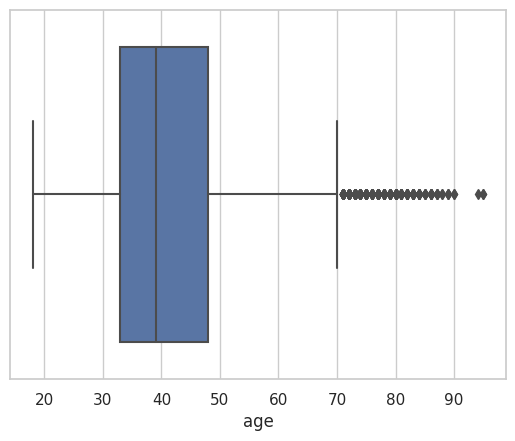

In [24]:
sns.set(style = "whitegrid")
sns.boxplot(x=df['age'])

Finding Outlier Value using IQR

In [25]:
q1,q3 = np.percentile(df['age'],[25,75])
IQR = q3-q1
upper=q3+1.5*IQR
lower = q1-1.5*IQR
print("Upper bound:",upper,"lower bound:",lower)

Upper bound: 70.5 lower bound: 10.5


Removing Outlier

In [26]:
df.age = df.age.clip(10.5,70.5)
df.age.describe()

count    43187.000000
mean        40.702549
std         10.305239
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

<Axes: xlabel='age'>

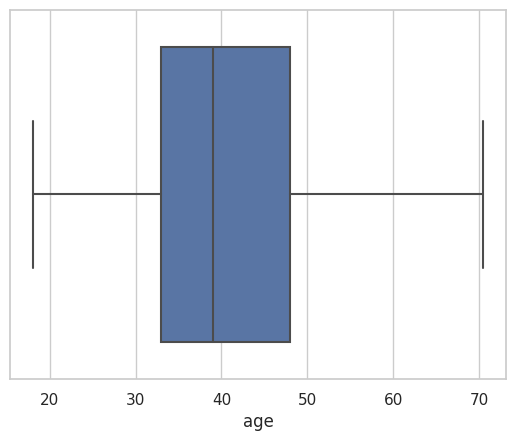

In [27]:
sns.set(style = "whitegrid")
sns.boxplot(x=df['age'])

Day

<Axes: xlabel='day'>

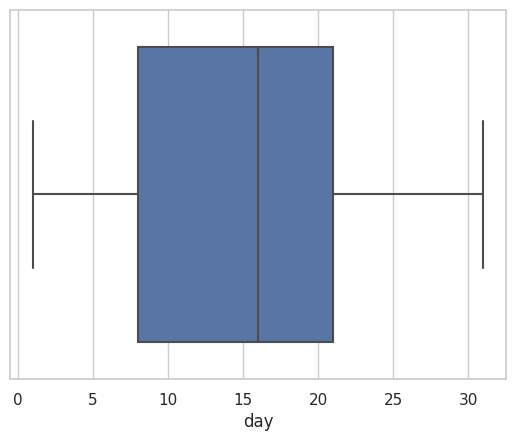

In [28]:
sns.set(style = "whitegrid")
sns.boxplot(x=df['day'])

Day has no Outlier 

Duration

<Axes: xlabel='dur'>

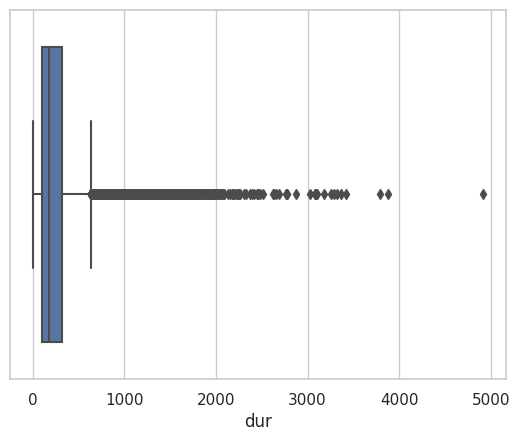

In [29]:
sns.set(style = "whitegrid")
sns.boxplot(x=df['dur'])

In [30]:
q1,q3 = np.percentile(df['dur'],[25,75])
IQR = q3-q1
upper=q3+1.5*IQR
lower = q1-1.5*IQR
print("Upper bound:",upper,"lower bound:",lower)

Upper bound: 640.5 lower bound: -219.5


In [31]:
df.dur = df.dur.clip(-219.5,640.5)
df.dur.describe()

count    43187.000000
mean       234.788038
std        176.240001
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max        640.500000
Name: dur, dtype: float64

<Axes: xlabel='dur'>

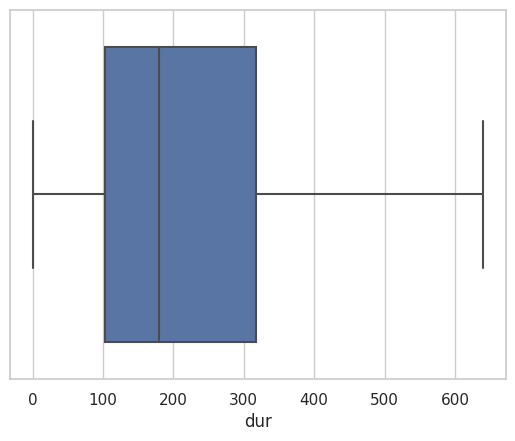

In [32]:
sns.set(style = "whitegrid")
sns.boxplot(x=df['dur'])

No of Calls

<Axes: xlabel='num_calls'>

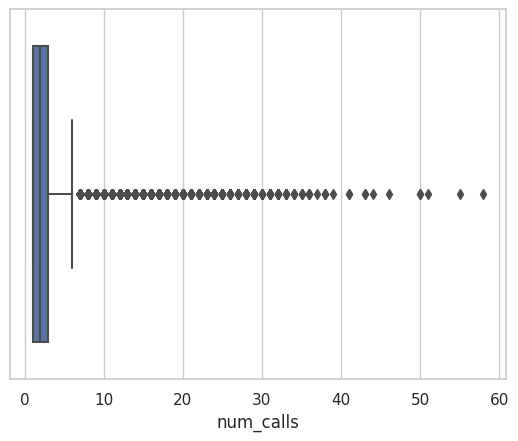

In [33]:
sns.set(style = "whitegrid")
sns.boxplot(x=df['num_calls'])

In [34]:
q1,q3 = np.percentile(df['num_calls'],[25,75])
IQR = q3-q1
upper=q3+1.5*IQR
lower = q1-1.5*IQR
print("Upper bound:",upper,"lower bound:",lower)

Upper bound: 6.0 lower bound: -2.0


In [35]:
df.num_calls = df.num_calls.clip(-2,6)
df.num_calls.describe()

count    43187.000000
mean         2.393081
std          1.598892
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

<Axes: xlabel='num_calls'>

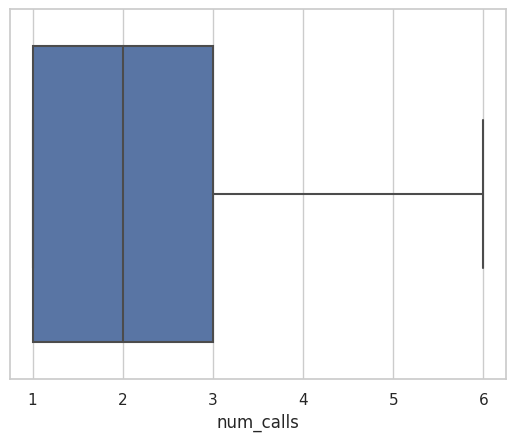

In [36]:
sns.set(style = "whitegrid")
sns.boxplot(x=df['num_calls'])

outliers are clear. Data cleaning process done

# Exploratory Data Analysis

Distribution of Feature and Target Variable

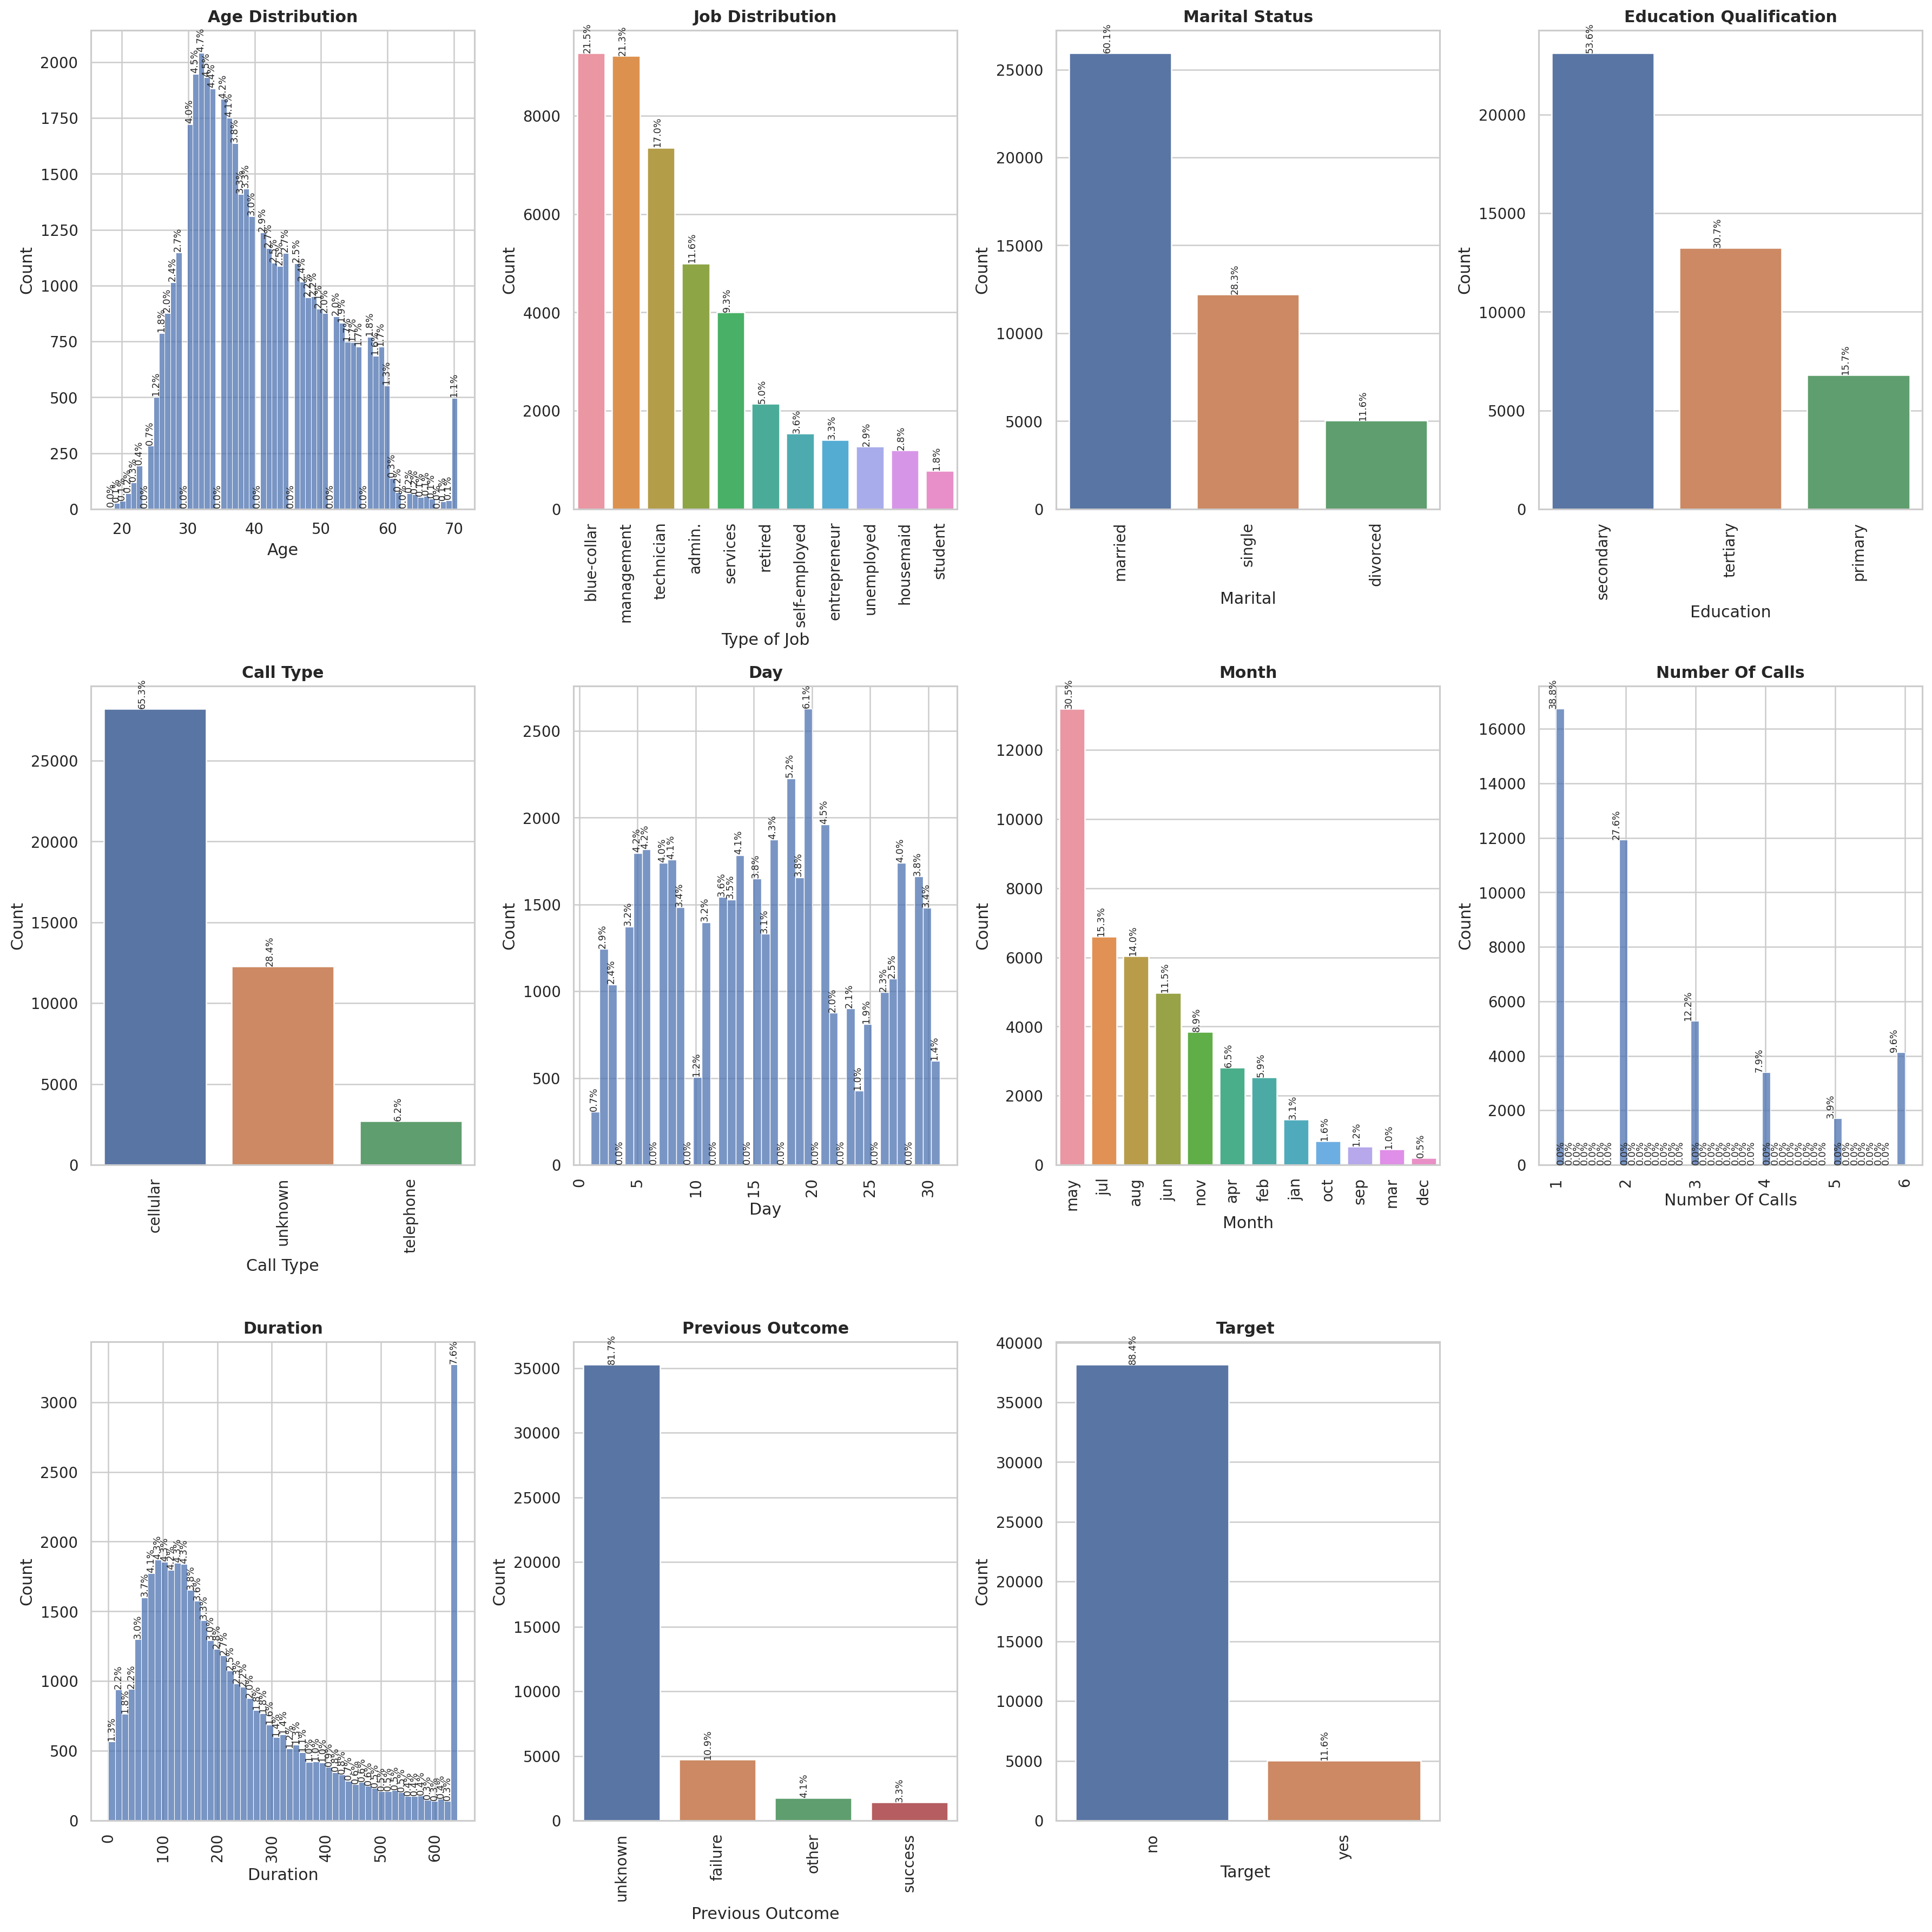

In [37]:
  plt.figure(figsize=(20,20),dpi=180)

  #Age Distribution

  plt.subplot(3,4,1)
  sns.histplot((df.age))

  ax=plt.gca()

  # % of Each Category
  total =float(len(df['age']))
  for i in ax.patches:
    height = i.get_height()
    per = '{:.1f}%'.format(100*height/total)
    x=i.get_x()+i.get_width()/2-0.1
    y=height+5
    ax.text(x,y,per,fontsize=7,rotation=90,ha='center',va='bottom')

  plt.title('Age Distribution',fontsize=12,fontweight='bold')
  plt.xlabel('Age',fontsize=12)
  plt.ylabel('Count',fontsize=12)

    #Job Distribution

  plt.subplot(3,4,2)
  sns.countplot (x=df['job'],order=df.job.value_counts().index)

  ax=plt.gca()

    # % of Each Category
  total =float(len(df['job']))
  for i in ax.patches:
      height = i.get_height()
      per = '{:.1f}%'.format(100*height/total)
      x=i.get_x()+i.get_width()/2-0.1
      y=height+5
      ax.text(x,y,per,fontsize=7,rotation=90,ha='center',va='bottom')

  plt.title('Job Distribution',fontsize=12,fontweight='bold')
  plt.xlabel('Type of Job',fontsize=12,)
  plt.xticks(rotation=90)
  plt.ylabel('Count',fontsize=12)

#Marital distribution

plt.subplot(3,4,3)
sns.countplot (x=df['marital'],order=df.marital.value_counts().index)

ax=plt.gca()

  # % of Each Category
  total =float(len(df['marital']))
  for i in ax.patches:
      height = i.get_height()
      per = '{:.1f}%'.format(100*height/total)
      x=i.get_x()+i.get_width()/2-0.1
      y=height+5
      ax.text(x,y,per,fontsize=7,rotation=90,ha='center',va='bottom')

  plt.title('Marital Status',fontsize=12,fontweight='bold')
  plt.xlabel('Marital',fontsize=12,)
  plt.xticks(rotation=90)
  plt.ylabel('Count',fontsize=12)

  #Education qualification

  plt.subplot(3,4,4)
  sns.countplot (x=df['education_qual'],order=df.education_qual.value_counts().index)

  ax=plt.gca()

  # % of Each Category
  total =float(len(df['education_qual']))
  for i in ax.patches:
      height = i.get_height()
      per = '{:.1f}%'.format(100*height/total)
      x=i.get_x()+i.get_width()/2-0.1
      y=height+5
      ax.text(x,y,per,fontsize=7,rotation=90,ha='center',va='bottom')

  plt.title('Education Qualification',fontsize=12,fontweight='bold')
  plt.xlabel('Education',fontsize=12)
  plt.xticks(rotation=90)
  plt.ylabel('Count',fontsize=12)

  #Call type

  plt.subplot(3,4,5)
  sns.countplot (x=df['call_type'],order=df.call_type.value_counts().index)

  ax=plt.gca()

  # % of Each Category
  total =float(len(df['call_type']))
  for i in ax.patches:
      height = i.get_height()
      per = '{:.1f}%'.format(100*height/total)
      x=i.get_x()+i.get_width()/2-0.1
      y=height+5
      ax.text(x,y,per,fontsize=7,rotation=90,ha='center',va='bottom')

  plt.title('Call Type',fontsize=12,fontweight='bold')
  plt.xlabel('Call Type',fontsize=12)
  plt.xticks(rotation=90)
  plt.ylabel('Count',fontsize=12)

  #Day

  plt.subplot(3,4,6)
  sns.histplot(df['day'])

  ax=plt.gca()

  # % of Each Category
  total =float(len(df['day']))
  for i in ax.patches:
      height = i.get_height()
      per = '{:.1f}%'.format(100*height/total)
      x=i.get_x()+i.get_width()/2-0.1
      y=height+5
      ax.text(x,y,per,fontsize=7,rotation=90,ha='center',va='bottom')

  plt.title('Day',fontsize=12,fontweight='bold')
  plt.xlabel('Day',fontsize=12)
  plt.xticks(rotation=90)
  plt.ylabel('Count',fontsize=12)

  #Month

  plt.subplot(3,4,7)
  sns.countplot (x=df['mon'],order=df.mon.value_counts().index)

  ax=plt.gca()

  # % of Each Category
  total =float(len(df['mon']))
  for i in ax.patches:
      height = i.get_height()
      per = '{:.1f}%'.format(100*height/total)
      x=i.get_x()+i.get_width()/2-0.1
      y=height+5
      ax.text(x,y,per,fontsize=7,rotation=90,ha='center',va='bottom')

  plt.title('Month',fontsize=12,fontweight='bold')
  plt.xlabel('Month',fontsize=12)
  plt.xticks(rotation=90)
  plt.ylabel('Count',fontsize=12)

  # Numbers of Calls

  plt.subplot(3,4,8)
  sns.histplot (df['num_calls'])

  ax=plt.gca()

  # % of Each Category
  total =float(len(df['num_calls']))
  for i in ax.patches:
      height = i.get_height()
      per = '{:.1f}%'.format(100*height/total)
      x=i.get_x()+i.get_width()/2-0.1
      y=height+5
      ax.text(x,y,per,fontsize=7,rotation=90,ha='center',va='bottom')

  plt.title('Number Of Calls',fontsize=12,fontweight='bold')
  plt.xlabel('Number Of Calls',fontsize=12)
  plt.xticks(rotation=90)
  plt.ylabel('Count',fontsize=12)

  #Duration

  plt.subplot(3,4,9)
  sns.histplot((df.dur))

  ax=plt.gca()

  # % of Each Category
  total =float(len(df['dur']))
  for i in ax.patches:
      height = i.get_height()
      per = '{:.1f}%'.format(100*height/total)
      x=i.get_x()+i.get_width()/2-0.1
      y=height+5
      ax.text(x,y,per,fontsize=7,rotation=90,ha='center',va='bottom')

  plt.title('Duration',fontsize=12,fontweight='bold')
  plt.xlabel('Duration',fontsize=12)
  plt.xticks(rotation=90)
  plt.ylabel('Count',fontsize=12)

  #Previous outcome

  plt.subplot(3,4,11)
  sns.countplot(x=df['y'])

  ax=plt.gca()

  # % of Each Category
  total =float(len(df['y']))
  for i in ax.patches:
      height = i.get_height()
      per = '{:.1f}%'.format(100*height/total)
      x=i.get_x()+i.get_width()/2-0.1
      y=height+5
      ax.text(x,y,per,fontsize=7,rotation=90,ha='center',va='bottom')

  plt.title('Target ',fontsize=12,fontweight='bold')
  plt.xlabel('Target ',fontsize=12)
  plt.xticks(rotation=90)
  plt.ylabel('Count',fontsize=12)

  #Target

  plt.subplot(3,4,10)
  sns.countplot(x=df['prev_outcome'])

  ax=plt.gca()

  # % of Each Category
  total =float(len(df['prev_outcome']))
  for i in ax.patches:
      height = i.get_height()
      per = '{:.1f}%'.format(100*height/total)
      x=i.get_x()+i.get_width()/2-0.1
      y=height+5
      ax.text(x,y,per,fontsize=7,rotation=90,ha='center',va='bottom')

  plt.title('Previous Outcome',fontsize=12,fontweight='bold')
  plt.xlabel('Previous Outcome',fontsize=12)
  plt.xticks(rotation=90)
  plt.ylabel('Count',fontsize=12)

  plt.tight_layout()

  plt.show()

# Interpretation

**Age**

*   High on Target : 30 to 40 Years
*   Low on Target  : Below 20 and above 60 Years

**Job**

*   High on Target : Blue collar and management
*   Low on Target  : Students and Housemaid

**Marital Status**

*   High on Target : Maried
*   Low on Target  : Divorced

**Education**

*   High on Target : Secondary
*   Low on Target  : Primary

**Call Type**

*   High on Target : Cellular
*   Low on Target  : Telephone

**Day**


*   High on Target : Mid of the month
*   Low on Target  : Starting of the month

**Month**

*   High on Target : May
*   Low on Target  : December

**Duration**

*   High on Target : Call Duration of 29 minutes 
*   Low on Target  : Call Duration around 2 to 3 minutes

**No of Calls**

*   High on Target : Custumer has been called for 1 time
*   Low on Target  : Custumer has been called for 5 times

**Previous Outcome**

*   High on Target : Unknown
*   Low on Target  : Success

**Target**

*   Based on EDA (NO) % is High of 88.4%.

* So as per the dataset we have to concentrate on the 88.4 % for the customer conversion.



# Features Vs Target EDA


Variables are Job, Marital, Educational Qualification, Call Type, Month

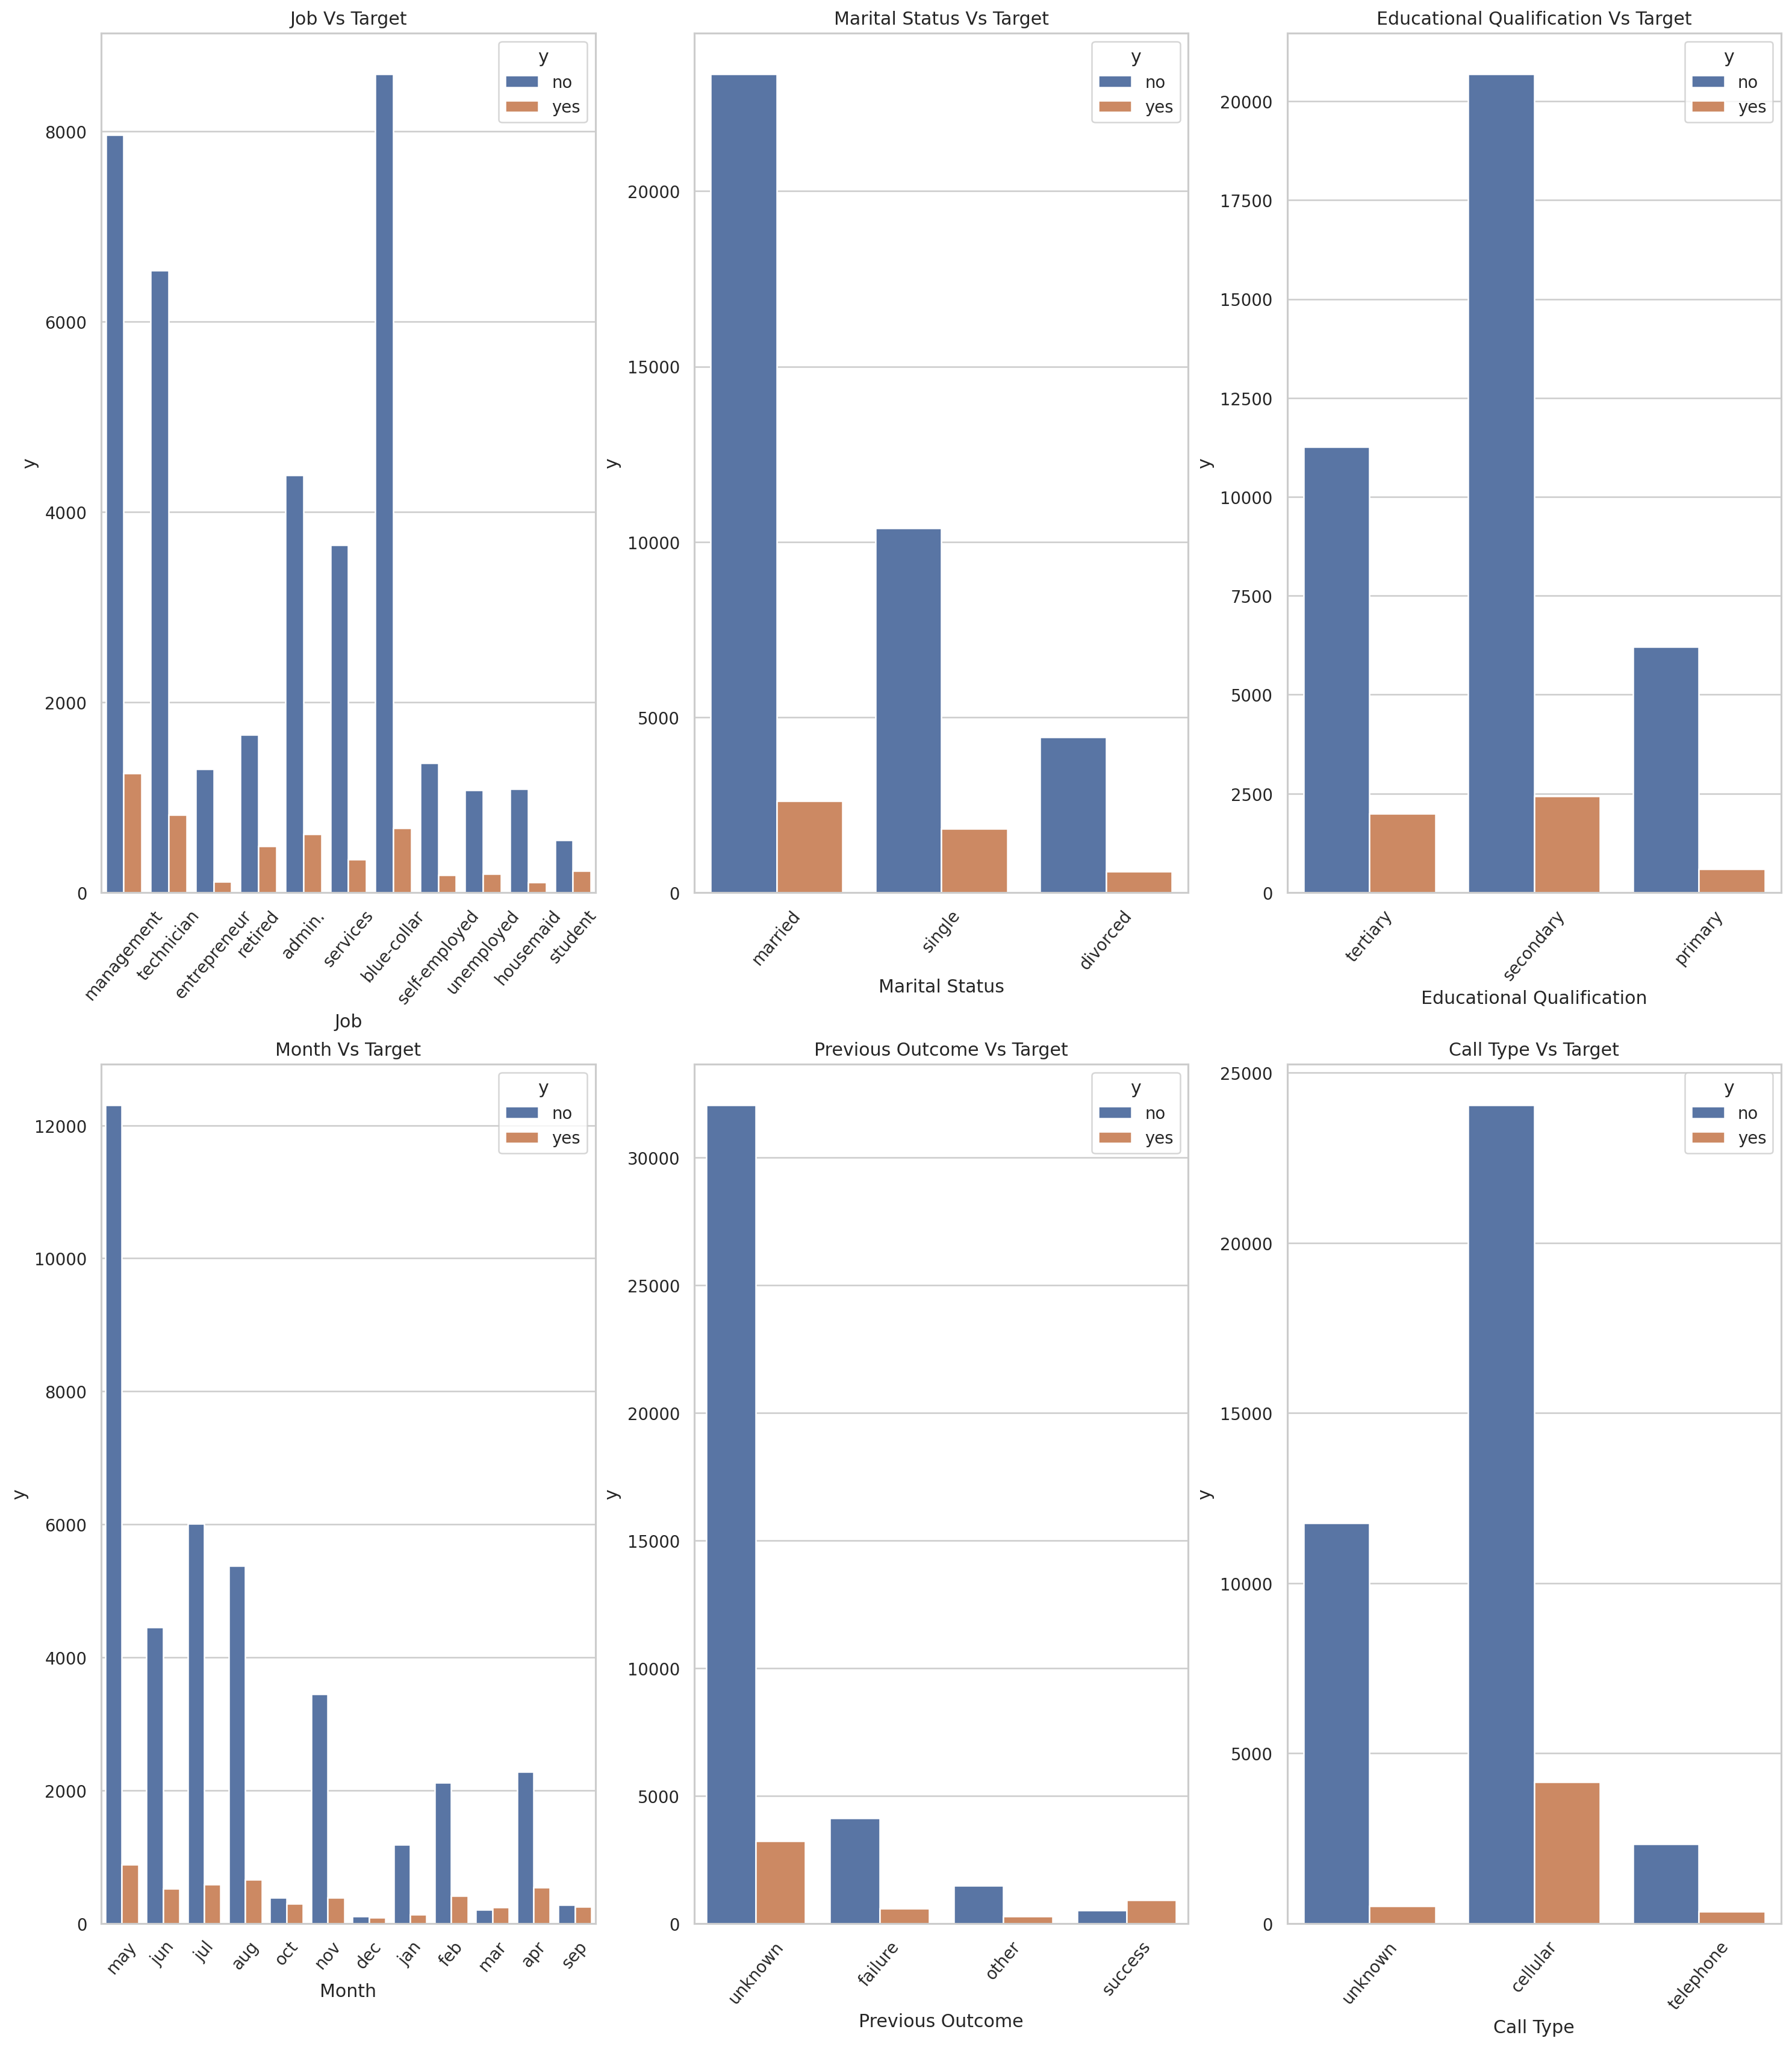

In [38]:
plt.figure(figsize=(20,35),dpi=180)

#Job Vs Target

plt.subplot(3,3,1)
sns.countplot(x='job',hue='y',data=df)

plt.xticks(rotation=50)
plt.title("Job Vs Target")
plt.xlabel("Job")
plt.ylabel("y")

#Marital Status

plt.subplot(3,3,2)
sns.countplot(x='marital',hue='y',data=df)

plt.xticks(rotation=50)
plt.title("Marital Status Vs Target")
plt.xlabel("Marital Status")
plt.ylabel("y")

#Educational Qualification

plt.subplot(3,3,3)
sns.countplot(x='education_qual',hue='y',data=df)

plt.xticks(rotation=50)
plt.title("Educational Qualification Vs Target")
plt.xlabel("Educational Qualification")
plt.ylabel("y")

#Month

plt.subplot(3,3,4)
sns.countplot(x='mon',hue='y',data=df)

plt.xticks(rotation=50)
plt.title("Month Vs Target")
plt.xlabel("Month")
plt.ylabel("y")

#Previous Outcome

plt.subplot(3,3,5)
sns.countplot(x='prev_outcome',hue='y',data=df)

plt.xticks(rotation=50)
plt.title("Previous Outcome Vs Target")
plt.xlabel("Previous Outcome")
plt.ylabel("y")

#Call Type

plt.subplot(3,3,6)
sns.countplot(x='call_type',hue='y',data=df)

plt.xticks(rotation=50)
plt.title("Call Type Vs Target")
plt.xlabel("Call Type")
plt.ylabel("y")

plt.show()

# Interpretation

Categorical Data based on Target

**Jobs vs Target**

*   Target - Blue Collar

**Marital Status vs Target**

*   Target - Married

**Educational Qualification vs Target**

*   Target - Secondary


**Month vs Target**

*   Target - May

**Previous Outcome vs Target**

*   Target - unknown


**Call Type vs Target**

*   Target - Cellular

# % EDA for Feature Vs Target

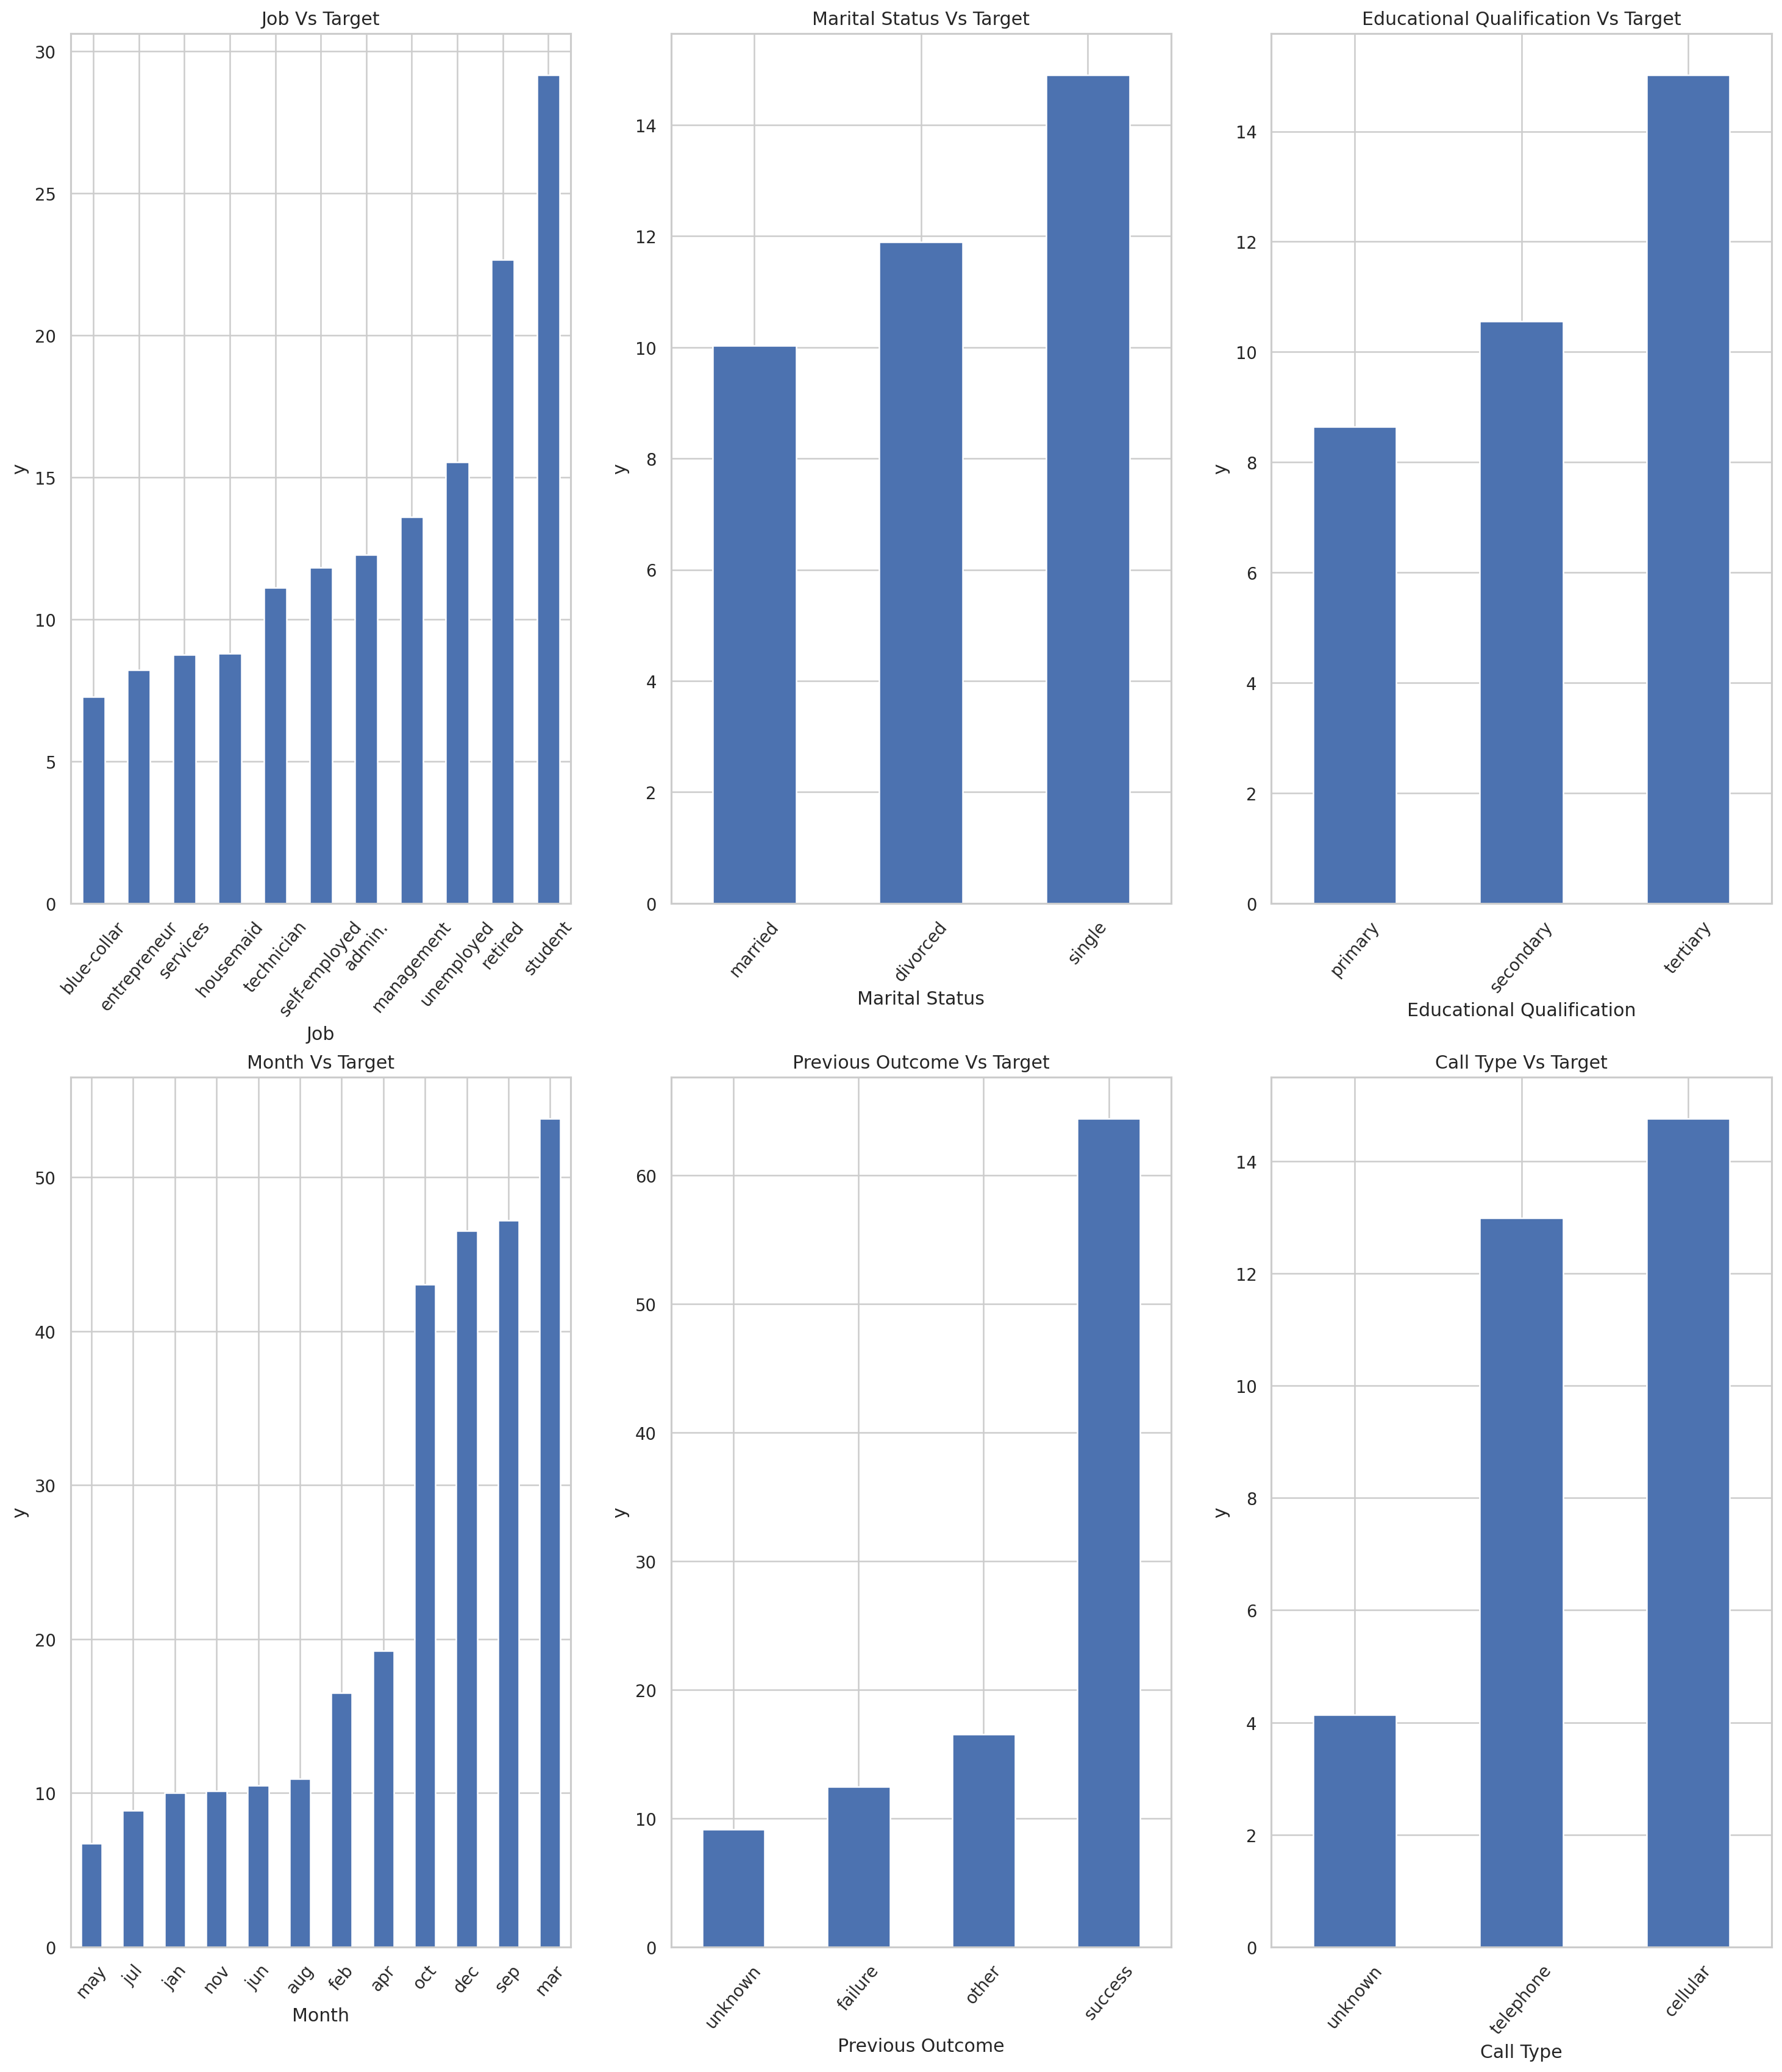

In [39]:
plt.figure(figsize=(20,35),dpi=180)

#Job

plt.subplot(3,3,1)
(df.groupby('job')['target'].mean()*100).sort_values().plot(kind='bar')

plt.xticks(rotation=50)
plt.title("Job Vs Target")
plt.xlabel("Job")
plt.ylabel("y")

#Marital Status

plt.subplot(3,3,2)
(df.groupby('marital')['target'].mean()*100).sort_values().plot(kind='bar')

plt.xticks(rotation=50)
plt.title("Marital Status Vs Target")
plt.xlabel("Marital Status")
plt.ylabel("y")

#Educational Qualification

plt.subplot(3,3,3)
(df.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind='bar')

plt.xticks(rotation=50)
plt.title("Educational Qualification Vs Target")
plt.xlabel("Educational Qualification")
plt.ylabel("y")

#Month

plt.subplot(3,3,4)
(df.groupby('mon')['target'].mean()*100).sort_values().plot(kind='bar')

plt.xticks(rotation=50)
plt.title("Month Vs Target")
plt.xlabel("Month")
plt.ylabel("y")

#Previous Outcome

plt.subplot(3,3,5)
(df.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind='bar')

plt.xticks(rotation=50)
plt.title("Previous Outcome Vs Target")
plt.xlabel("Previous Outcome")
plt.ylabel("y")

#Call Type

plt.subplot(3,3,6)
(df.groupby('call_type')['target'].mean()*100).sort_values().plot(kind='bar')

plt.xticks(rotation=50)
plt.title("Call Type Vs Target")
plt.xlabel("Call Type")
plt.ylabel("y")

plt.show()


# Interpretation

% of Subscribed based on Categorical data

**Jobs vs Target**

*   High in % : Student and retired
*   Low in %  : blue collar

**Marital Status vs Target**

*   High in % : Single
*   Low in %  : Married

**Educational Qualification vs Target**

*   High in % : Teritary
*   Low in %  : Primary

**Month vs Target**

*   High in % : March and September
*   Low in %  : May

**Call Type vs Target**

*   High in % : Cellular
*   Low in %  : Unknown

**Previous Outcome vs Target**

*   High in % : Success 
*   Low in %  : Unknown

# Numerical Vs Target EDA


Variables are Age, Day, Duration, No Of Calls

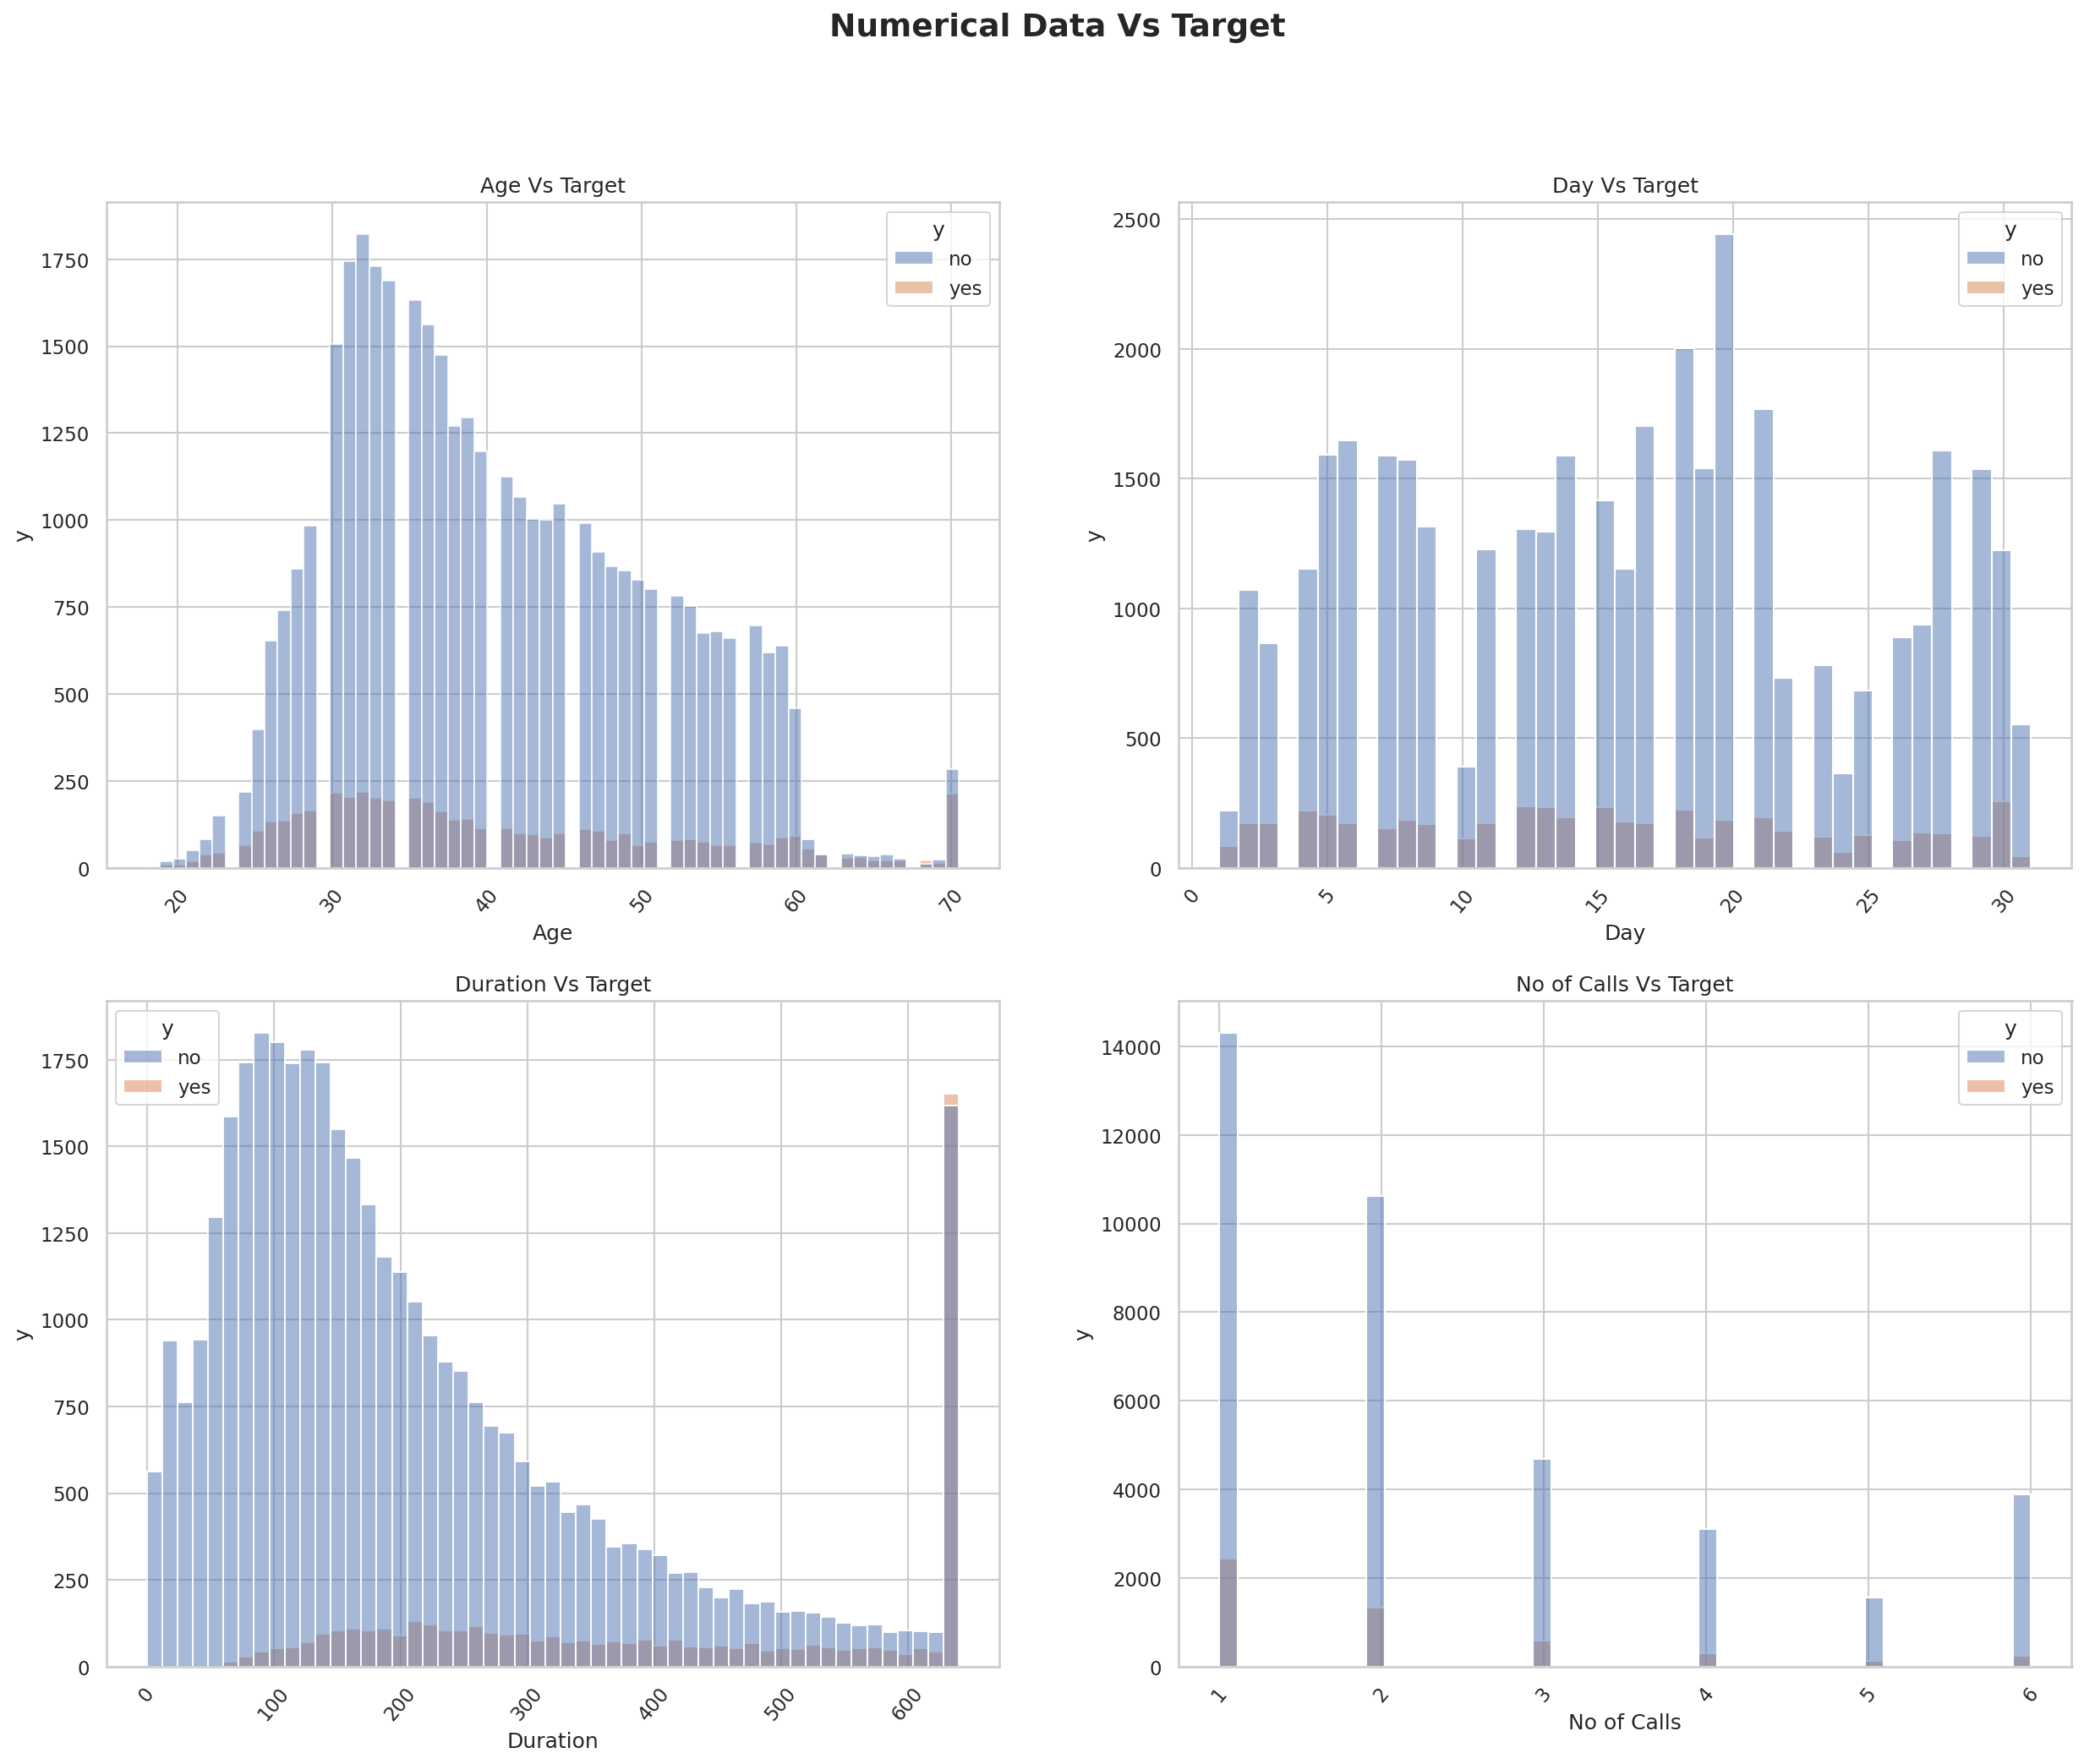

In [40]:
plt.figure(figsize=(20,15),dpi=150)

plt.suptitle("Numerical Data Vs Target",fontsize=18,fontweight="bold")

#Age

plt.subplot(2,2,1)
sns.histplot(x='age',hue='y',data=df)

plt.xticks(rotation=50)
plt.title("Age Vs Target")
plt.xlabel("Age")
plt.ylabel("y")

#Day

plt.subplot(2,2,2)
sns.histplot(x='day',hue='y',data=df)

plt.xticks(rotation=50)
plt.title("Day Vs Target")
plt.xlabel("Day")
plt.ylabel("y")

#Duration 

plt.subplot(2,2,3)
sns.histplot(x='dur',hue='y',data=df)

plt.xticks(rotation=50)
plt.title("Duration Vs Target")
plt.xlabel("Duration")
plt.ylabel("y")

#No of Calls

plt.subplot(2,2,4)
sns.histplot(x='num_calls',hue='y',data=df)

plt.xticks(rotation=50)
plt.title("No of Calls Vs Target")
plt.xlabel("No of Calls")
plt.ylabel("y")

plt.show()

# Interpretation

**Age Vs Target**

30 to 40 Age range are the target Custumer.

**Day Vs Target**

In a month from 10th to 20th Custumer conversion is higher

**Duration vs Target**

The call Duration has a huge impact on Custumer conversion

**No of Calls vs Target**

Custumer conversion range has boosted up based on the numbers of calls.





# Encoding the data

For this dataset i am doing LABEL ENCODING

In [41]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

Encoding


In [42]:
#Job
df['job']=df['job'].map({
    'blue-collar':1,
    'entrepreneur':2,
    'services':3,
    'housemaid':4,
    'technician':5,
    'self-employed':6,
    'admin':7,
    'management':8,
    'unemployed':9,
    'retired':10,
    'student':11
})

#Marital status

df['marital']=df['marital'].map({
    'married':1,
    'divorced':2,
    'single':3
})

#educational qualification

df['education_qual']=df['education_qual'].map({
    'primary':1,
    'secondary':2,
    'tertiary':3
})

#Month

df['mon']=df['mon'].map({
    'may':1,
    'jul':2,
    'jan':3,
    'nov':4,
    'jun':5,
    'aug':6,
    'feb':7,
    'apr':8,
    'oct':9,
    'dec':10,
    'sep':11,
    'mar':12
})

#Call Type

df['call_type']=df['call_type'].map({
    'unknown':1,
    'telephone':2,
    'cellular':3
})

#Previous Outcome

df['prev_outcome']=df['prev_outcome'].map({
    'unknown':1,
    'failure':2,
    'other':3,
    'success':4
})

df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8.0,1,3,1,5,1,261.0,1,1,no,0
1,44.0,5.0,3,2,1,5,1,151.0,1,1,no,0
2,33.0,2.0,1,2,1,5,1,76.0,1,1,no,0
5,35.0,8.0,1,3,1,5,1,139.0,1,1,no,0
6,28.0,8.0,3,3,1,5,1,217.0,1,1,no,0


In [43]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

# Assigning Feature and Target Values

In [44]:
X=df[['age','job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome']]
Y=df['target']
X = np.nan_to_num(X)

Spliting the data for training and Testing

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=3)

Balancing the data

In [46]:
smt=SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train,y_train)

print(len(x_train_smt))
print(len(y_train_smt))

45847
45847


**From the above Output training data is balanced.**


#Scaling

In [47]:
scaler = StandardScaler()
x_train_sca = scaler.fit_transform(x_train_smt)
x_test_sca = scaler.transform(x_test)

# ML Models


**Logistic Regression**

In [48]:
lr = LogisticRegression()

lr.fit(x_train_sca,y_train_smt)
lr.score(x_test_sca,y_test)

0.77124334336652

**K-Nearest Neighbour**

In [49]:
 for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_sca, y_train_smt) 
  print("K value :", i, "Train Score : ", knn.score(x_train_sca,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_sca, y_test, cv=10)))

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8717297058963727
K value : 2 Train Score :  0.9945688921848758 Cross Value Accuracy : 0.8919509390342724
K value : 3 Train Score :  0.9771195498069667 Cross Value Accuracy : 0.8881694790028123
K value : 4 Train Score :  0.9767487512814361 Cross Value Accuracy : 0.8932621907621909
K value : 5 Train Score :  0.9675878465330338 Cross Value Accuracy : 0.891101816101816
K value : 6 Train Score :  0.9678932100246472 Cross Value Accuracy : 0.8941115520282187
K value : 7 Train Score :  0.9613497066329313 Cross Value Accuracy : 0.8927993469660136
K value : 8 Train Score :  0.9610225314633455 Cross Value Accuracy : 0.8951917393584059
K value : 9 Train Score :  0.9561149039195586 Cross Value Accuracy : 0.8948060560560561
K value : 10 Train Score :  0.954675333173381 Cross Value Accuracy : 0.8959630463797131
K value : 20 Train Score :  0.9395816520164896 Cross Value Accuracy : 0.8955782568282569
K value : 30 Train Score :  0.931533142844679 C

When K Value is 10 the cross value accuracy is 0.895



In [50]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_sca, y_train_smt)
print("KNN Score: ",knn.score(x_test_sca,y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))

KNN Score:  0.8014972601682488
AUROC on the sampled dataset :  0.5484899765916065


**Decision Tree**

In [51]:
dt = DecisionTreeClassifier() 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.7874435333915097


In [52]:
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_sca, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7848714201583528  Cross val score :  0.8858532341865676
Depth  :  2  Training Accuracy :  0.8131829781665103  Cross val score :  0.8884006625673292
Depth  :  3  Training Accuracy :  0.8755207538115908  Cross val score :  0.8985878735878737
Depth  :  4  Training Accuracy :  0.9014548389207582  Cross val score :  0.9002868344535011
Depth  :  5  Training Accuracy :  0.9113355290422492  Cross val score :  0.9008260641593976
Depth  :  6  Training Accuracy :  0.923288328571117  Cross val score :  0.8999007340674007
Depth  :  7  Training Accuracy :  0.9403450607455232  Cross val score :  0.8983566900233567
Depth  :  8  Training Accuracy :  0.95247235369817  Cross val score :  0.8941890104390104
Depth  :  9  Training Accuracy :  0.9603899928021463  Cross val score :  0.8952701511034844
Depth  :  10  Training Accuracy :  0.9675660348550614  Cross val score :  0.8932630249296916
Depth  :  20  Training Accuracy :  0.9997600715423037  Cross val score :  0.871807

When Depth Value is 5 the cross value accuracy is 0.9007

**XG Boost**

In [53]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model 
  model.fit(x_train_smt,y_train_smt) #train the model 
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))

Learning rate :  0.01  Train score :  0.9443365978144699  Cross-Val score :  0.904994339577673
Learning rate :  0.02  Train score :  0.9540646061901542  Cross-Val score :  0.9042997163830497
Learning rate :  0.03  Train score :  0.9610443431413178  Cross-Val score :  0.9058435220935221
Learning rate :  0.04  Train score :  0.9674351647872271  Cross-Val score :  0.9055345226178562
Learning rate :  0.05  Train score :  0.9714048901782014  Cross-Val score :  0.9057660040993374
Learning rate :  0.1  Train score :  0.9796060810958187  Cross-Val score :  0.9038365150865152
Learning rate :  0.11  Train score :  0.979846009553515  Cross-Val score :  0.9050712617379284
Learning rate :  0.12  Train score :  0.9802604314349903  Cross-Val score :  0.9043765193765194
Learning rate :  0.13  Train score :  0.9810674635199685  Cross-Val score :  0.9033725987892656
Learning rate :  0.14  Train score :  0.9814382620454991  Cross-Val score :  0.9042224367224367
Learning rate :  0.15  Train score :  0.981

Learning Rate 0.3 is getting the best cross validation score of 0.9058

**Random Forest**

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [55]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9997600715423037  Cross val score :  0.8828316242143567
Depth  :  2  Training Accuracy :  0.9997600715423037  Cross val score :  0.884452530598743
Depth  :  3  Training Accuracy :  0.9997600715423037  Cross val score :  0.8906384386371153
Depth  :  4  Training Accuracy :  0.9997600715423037  Cross val score :  0.8949388025140589
Depth  :  5  Training Accuracy :  0.9997600715423037  Cross val score :  0.8962950711214026
Depth  :  6  Training Accuracy :  0.9997600715423037  Cross val score :  0.898312934171353
Depth  :  7  Training Accuracy :  0.9997600715423037  Cross val score :  0.9014555077737347
Depth  :  8  Training Accuracy :  0.9997600715423037  Cross val score :  0.902480979159775
Depth  :  9  Training Accuracy :  0.9997600715423037  Cross val score :  0.903771088322858
Depth  :  10  Training Accuracy :  0.9997600715423037  Cross val score :  0.9044326827654648


Depth = 10 is giving the good cross validation score fo 0.9047

# Output

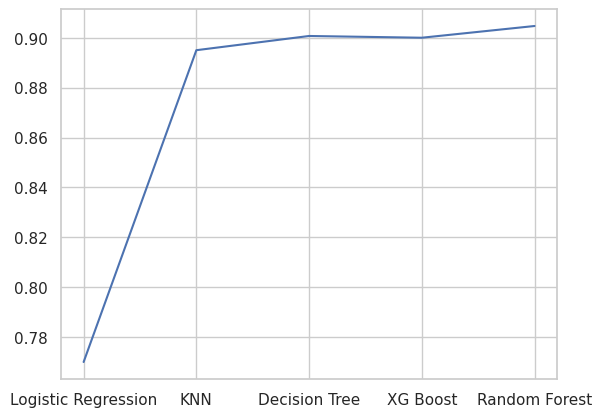

In [56]:
x = np.array(["Logistic Regression", "KNN", "Decision Tree", "XG Boost",'Random Forest'])
y = np.array([0.77, 0.895, 0.9007, 0.90,0.9047])

plt.plot(x,y)
plt.show()

## Model Testing Results

As per the above line plot Random Forest has high in AUROC Score.

So then Results shows that best fit model for this Customer convertion predication data set.

# Features importance

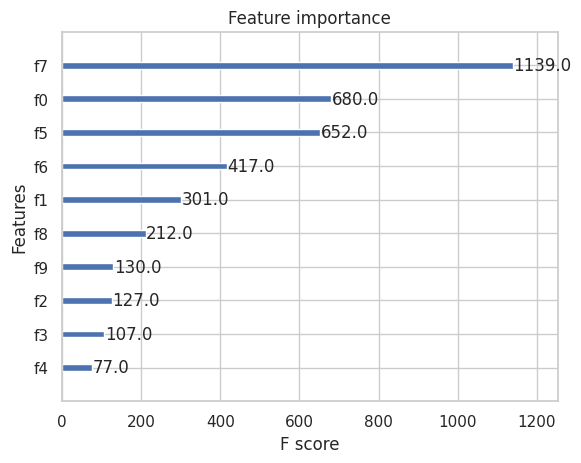

In [57]:
# plot feature importance
plot_importance(model)
plt.show()

In [58]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

#Interpretation

f0 - age       
f1 - job     
f2 - marital  
f3 - education_qual   
f4 - call_type    
f5 - day    
f6 - mon     
f7 - Duration     
f8 - num_calls  
f9 - prev_outcome   
f10 -y  





# Business Insights based on Feature Importance Plot

**Top 5 Business Insights that need to be implement to boost up Customer Conversion.**



1. **Duration** - To influces the customer for conversion call duration must be longer and informative for high result.

2. **Age** - As per the plot Middle age person are the target to boost the task.

3. **Day** - Most of the subscription will be ending in mid of the month. So the best time to make a conversion based on days are from 10th to 20th of the month.

4. **Month** - Based on the plot the conversion rate is high in the month of MAY.

5. **Job** - Blue Collar Job category person are the target for the conversion.
